In [1]:
!python -V

Python 3.6.0


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys,inspect
from sklearn.model_selection import train_test_split
# [START 自作モジュールの読み込み]
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
from fmlite.core import FMLite
# [END 自作モジュールの読み込み]

In [3]:
X = np.matrix([
  #  Users  |     Movies     |    Movie Ratings   | Time | Last Movies Rated
  # A  B  C | TI  NH  SW  ST | TI   NH   SW   ST  |      | TI  NH  SW  ST
    [1, 0, 0,  1,  0,  0,  0,   0.3, 0.3, 0.3, 0,     13,   0,  0,  0,  0 ],
    [1, 0, 0,  0,  1,  0,  0,   0.3, 0.3, 0.3, 0,     14,   1,  0,  0,  0 ],
    [1, 0, 0,  0,  0,  1,  0,   0.3, 0.3, 0.3, 0,     16,   0,  1,  0,  0 ],
    [0, 1, 0,  0,  0,  1,  0,   0,   0,   0.5, 0.5,   5,    0,  0,  0,  0 ],
    [0, 1, 0,  0,  0,  0,  1,   0,   0,   0.5, 0.5,   8,    0,  0,  1,  0 ],
    [0, 0, 1,  1,  0,  0,  0,   0.5, 0,   0.5, 0,     9,    0,  0,  0,  0 ],
    [0, 0, 1,  0,  0,  1,  0,   0.5, 0,   0.5, 0,     12,   1,  0,  0,  0 ]
])
y = np.array([5, 3, 1, 4, 5, 1, 5])

# [START train test split]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# [END train test split]

In [4]:
# [START モデルの学習]
model = FMLite(k=3, n_epochs=20).fit(X_train, y_train)
# [END モデルの学習]

100%|██████████| 20/20 [00:00<00:00, 41.19it/s]

+---------+---------+
| FIELD   |  VALUE  |
+---------+---------+
| epochs  |    20   |
| RMSE    |   2.0   |
| bias    |  0.1378 |
| feat 1  | -0.1123 |
| feat 2  |  0.2186 |
| feat 3  |  0.0316 |
| feat 4  | -0.0552 |
| feat 5  |  0.0001 |
| feat 6  |  0.0774 |
| feat 7  |  0.1155 |
| feat 8  | -0.0179 |
| feat 9  | -0.0337 |
| feat 10 |  0.0914 |
| feat 11 |  0.1093 |
| feat 12 |  0.1867 |
| feat 13 |  0.0868 |
| feat 14 | -0.1124 |
| feat 15 |  0.1155 |
| feat 16 |   0.0   |
+---------+---------+


In [5]:
# [START モデルによる予測]
y_pred = model.predict(X_test)
print('-----' * 10)
for pred, obs in zip(y_pred, y_train):
    print('予測値: {}'.format(round(pred, 4)))
    print('実測値: {}'.format(round(obs, 4)))
    print('-----' * 10)
# [END モデルによる予測]

--------------------------------------------------
予測値: 2.4089
実測値: 3
--------------------------------------------------


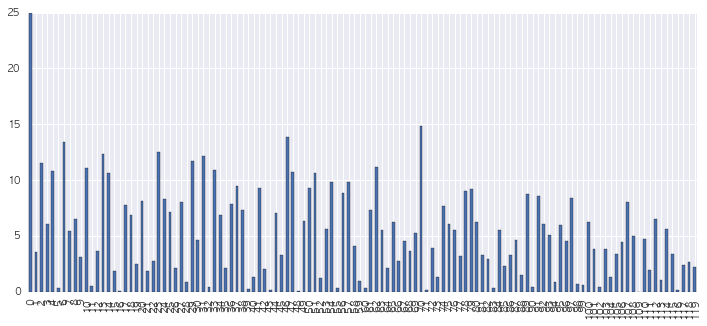

In [6]:
# [START 学習の過程の可視化]
ser = pd.Series(model.errors)
ser.map(lambda val: val ** 2).plot(kind='bar', figsize=(12, 5))
# [END 学習の過程の可視化]